# DBSCAN Clustering

Encuentra muestras *core* y expande clusters sobre ellas.

Tiene dos parámetros, `eps` y `num_of_samples`.
Es muy sensitivo a los parámetros.

Para este grupo de datos se repite el agrupamiento con tres valores de `eps`, y se obtiene un buen agrupamiento en el máximo del *coeficiente de silueta*.

Es lo que se debería hacer para encontrar un valor razonable de `eps`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Generamos las muestras con poca distancia
centers = [[0.5, 0.5], [-0.5, -1], [0.5, -1.0]]

O, true_labels = make_blobs(n_samples=750, centers=centers, cluster_std=0.25, random_state=0)

# Escalamos
X = StandardScaler().fit_transform(O)

Estimated number of clusters: 12
Estimated number of noise points: 518
Homogeneity: 0.3096220685442931
Completeness: 0.24727838807435917
V-measure: 0.27496061499661995
Adjusted Rand Index: 0.021885428514010808
Adjusted Mutual Information: 0.26502137746204896
Silhouette Coefficient: -0.3649954715151569


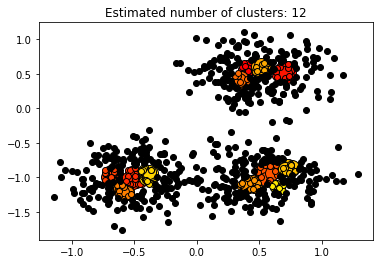

In [3]:
# Compute DBSCAN

# EPS = 0.1
db = DBSCAN(eps=0.1, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(true_labels, labels)}')
print(f'Completeness: {metrics.completeness_score(true_labels, labels)}')
print(f'V-measure: {metrics.v_measure_score(true_labels, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(true_labels, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(true_labels, labels, average_method="arithmetic")}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = O[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = O[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 91
Homogeneity: 0.8469604014484342
Completeness: 0.6971828265207376
V-measure: 0.7648076110265425
Adjusted Rand Index: 0.7910713574123857
Adjusted Mutual Information: 0.7640277014672979
Silhouette Coefficient: 0.5322547283910626


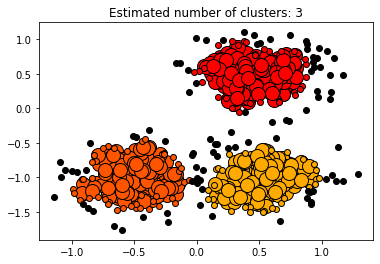

In [4]:
# Compute DBSCAN

# EPS = 0.2 
db = DBSCAN(eps=0.2, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(true_labels, labels)}')
print(f'Completeness: {metrics.completeness_score(true_labels, labels)}')
print(f'V-measure: {metrics.v_measure_score(true_labels, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(true_labels, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(true_labels, labels, average_method="arithmetic")}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = O[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = O[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 20
Homogeneity: 0.5627457396279213
Completeness: 0.8372516989690435
V-measure: 0.6730866980203195
Adjusted Rand Index: 0.5447652213577253
Adjusted Mutual Information: 0.6721148869865734
Silhouette Coefficient: 0.4484190108391881


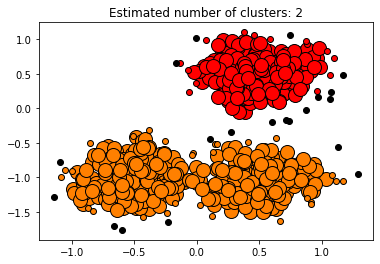

In [5]:
# Compute DBSCAN

# EPS = 0.3
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(true_labels, labels)}')
print(f'Completeness: {metrics.completeness_score(true_labels, labels)}')
print(f'V-measure: {metrics.v_measure_score(true_labels, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(true_labels, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(true_labels, labels, average_method="arithmetic")}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = O[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = O[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()